# CMT 309 Data Science Portfolio
# Parts 1 and 2

---

# Part 1 - Pre-processing and exploratory analysis

Instructions:

- Answer the questions by filling in the appropriate sections of this file. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

In [1]:
import scipy, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# add more imports here if you like
# ...

In [2]:
# change this line your folder where the data is found
basedir = '/Users/hasancanuzuner/Desktop/Cardiff Univertsity/Computational Data Science/Data Science Portfolio Assingment/'

In this part you will be working with the  `listings.csv` data. To help you wrap around your head we will first provide some information on the main columns in the data.

***Dataframe columns description***:

- `id` - unique ID identifying the listing

- `name` - title of the listing

- `host_id` - unique ID for a host

- `host_name` - first name of the host

- `host_since` - date that the host first joined Airbnb

- `host_is_superhost` - whether or not the host is a superhost, which is a mark of quality for the top-rated and most experienced hosts, and can increase your search ranking on Airbnb

- `host_listings_count` - how many listings the host has in total

- `host_has_profile_pic` - whether or not the host has a profile picture

- `host_identity_verified` - whether or not the host has been verified with his passport

- `neighbourhood_cleansed` - the borough the property is in

- `latitude` and `longitude` - geolocation coordinates of the property

- `property_type` - type of property, e.g. house or flat

- `room_type` - type of listing, e.g. entire home, private room or shared room

- `accommodates` - how many people the property accommodates

- `bedrooms` - number of bedrooms

- `beds` - number of beds

- `price` - nightly advertised price (the target variable)

- `minimum_nights` - the minimum length of stay

- `maximum_nights` - the maximum length of stay

- `availability_30` - how many nights are available to be booked in the next 30 days

- `availability_60` - how many nights are available to be booked in the next 60 days

- `availability_90` - how many nights are available to be booked in the next 90 days

- `availability_365` - how many nights are available to be booked in the next 365 days

- `number_of_reviews` - the number of reviews left for the property

- `number_of_reviews_ltm` - the number of reviews left for the property in the last twelve months

- `first_review` - the date of the first review

- `last_review` - the date of the most recent review

- `review_scores_rating` - guests can score properties overall from 1 to 5 stars

- `review_scores_accuracy` - guests can score the accuracy of a property's description from 1 to 5 stars

- `review_scores_cleanliness` - guests can score a property's cleanliness from 1 to 5 stars

- `review_scores_checkin` - guests can score their check-in from 1 to 5 stars

- `review_scores_communication` - guests can score a host's communication from 1 to 5 stars

- `review_scores_location` - guests can score a property's location from 1 to 5 stars

- `review_scores_value` - guests can score a booking's value for money from 1 to 5 stars

- `instant_bookable` - whether or not the property can be instant booked (i.e. booked straight away, without having to message the host first and wait to be accepted)

- `reviews_per_month` - calculated field of the average number of reviews left by guest each month


The next two cells load the `listings.csv` file into a dataframe. Once loaded, start working on the subsequent questions.

In [3]:
### DO NOT CHANGE THIS CELL
def load_csv(basedir):
  return pd.read_csv(os.path.join(basedir, 'listings.csv'))

In [4]:
### DO NOT CHANGE THIS CELL
df = load_csv(basedir)
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20201212211823,2020-12-13,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.95
1,20168,https://www.airbnb.com/rooms/20168,20201212211823,2020-12-13,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,NaN,t,2,0,2,0,2.58
2,25428,https://www.airbnb.com/rooms/25428,20201212211823,2020-12-13,Lovely apt in City Centre (w.lift) near Jordaan,Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.14
3,27886,https://www.airbnb.com/rooms/27886,20201212211823,2020-12-13,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,"Central, quiet, safe, clean and beautiful.",https://a0.muscache.com/pictures/02c2da9d-660e...,97647,https://www.airbnb.com/users/show/97647,...,10.0,10.0,10.0,NaN,t,1,0,1,0,2.01
4,28871,https://www.airbnb.com/rooms/28871,20201212211823,2020-12-13,Comfortable double room,<b>The space</b><br />In a monumental house ri...,"Flower market , Leidseplein , Rembrantsplein",https://a0.muscache.com/pictures/160889/362340...,124245,https://www.airbnb.com/users/show/124245,...,10.0,10.0,10.0,NaN,f,2,0,2,0,2.68


## Question 1a

In [5]:
# Do not rename the function, do not remove the return statement.
# Just add code before the return statement to add the required functionality.
def drop_cols(df):
    df = df.drop(['scrape_id','last_scraped','description','listing_url','neighbourhood','calendar_last_scraped', 'amenities','neighborhood_overview', 'picture_url','host_url', 'host_about', 'host_location','host_total_listings_count','host_thumbnail_url','host_picture_url', 'host_verifications','bathrooms_text','has_availability','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','number_of_reviews_l30d','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],1)
    print(len(df.columns))
    return df

In [6]:
df = drop_cols(df)
df.columns

45


Index(['id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_bookable',
       'reviews_per_month'],
      dtype='object')

In [7]:
def drop_cols_na(df, threshold):
  arr = []
  for i in range (0,len(df.isnull().sum())):
        #print(df.isnull().sum()[i])
        #print(len(df))
      complete = len(df) - df.isnull().sum()[i]
      rate = complete / len(df) 
      if rate < threshold/100:
          arr.append(i)
  print(arr)    
  df = df.drop(df.columns[arr], axis=1)
  return df

In [8]:
df = drop_cols_na(df, 0.8)

[14, 20, 26, 42]


In [9]:
len(df.columns)

41

## Question 1b

In [10]:
def binary_encoding(df):
    for i in df.columns:
        for j in range(0, len(df[i])):
            if df[i][j] == "t":
                df[i][j] = 1
            elif df[i][j] == "f":
                df[i][j] = 0
    return df

In [11]:
df = binary_encoding(df)

<ipython-input-10-53c580ef85a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 1
<ipython-input-10-53c580ef85a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][j] = 0


In [12]:
# hint: check Pandas to_datetime method
from datetime import date
from datetime import datetime
def add_host_days(df):
    arr = []
    df = df[df['host_since'].notna()].reset_index() 
    df["host_days"] = 0
    today = date.today()
    df['host_since'] = pd.to_datetime(df['host_since'])
    print(len(df))
    df = df[df['host_since'].notna()].reset_index() 
    print(len(df))
    
    for i in range(0,len(df)):
        arr.append((today - df.host_since[i].date()).days)
    df.host_days = arr
    print(len(df))
    print(len(arr))
    return df

In [13]:
def convert_price(df):
    for i in range (0,len(df["price"])):
        df["price"][i] = float(df["price"][i][1:].replace(",",""))
    return df

In [14]:
df = add_host_days(df)

18467
18467
18467
18467


In [15]:
df = convert_price(df)

<ipython-input-13-84a81d23e189>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["price"][i] = float(df["price"][i][1:].replace(",",""))


In [16]:
df.head(5)

,level_0,index,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
0,0,0,2818,Quiet Garden View Room & Super Fast WiFi,3159,Daniel,2008-09-24,NaN,NaN,100%,...,98.0,10.0,10.0,10.0,10.0,9.0,10.0,1,1.95,4604
1,1,1,20168,Studio with private bathroom in the centre 1,59484,Alexander,2009-12-02,NaN,NaN,100%,...,89.0,10.0,10.0,10.0,10.0,10.0,9.0,1,2.58,4170
2,2,2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,Joan,2009-11-20,within an hour,100%,57%,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0.14,4182
3,3,3,27886,"Romantic, stylish B&B houseboat in canal district",97647,Flip,2010-03-23,within an hour,100%,100%,...,99.0,10.0,10.0,10.0,10.0,10.0,10.0,1,2.01,4059
4,4,4,28871,Comfortable double room,124245,Edwin,2010-05-13,within an hour,100%,92%,...,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.68,4008


## Question 1c: Answering questions.

You do not need to write the answer. In each cell, provide the Pandas code that outputs the result. Each answer can be given with 1-2 lines of Python code. Example question and answer:

```python
# What is the total number of rows in the dataframe?
df.shape[0]
```

Now over to you:

In [17]:
# How many hosts offer 2 or more properties for rent?
df_host = df.host_name.value_counts().to_dict()
df_host = {name: offer for name, offer in df_host.items() if offer > 1}
df_host_list_more_than_1 = list(df_host.keys())
len(df_host_list_more_than_1)

2149

In [18]:
# What is the highest price for a listing?
max(df.price)

8000.0

In [19]:
df[df.price == 8000.0]

,level_0,index,id,name,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,host_days
88,88,88,258273,Great CENTRAL apartment De Pijp,1358307,Peter,2011-11-01,NaN,NaN,NaN,...,72.0,8.0,6.0,9.0,9.0,9.0,8.0,0,0.08,3471
10943,10943,10972,21946106,Modern appartment with canal view in city center,12583042,Jacqueline,2014-02-25,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.03,2624


In [20]:
# What is the ID of the listing that has the largest number of bedrooms?
max(df.bedrooms)
idxmax = df.bedrooms.idxmax()
print("ID of the largest number of bedrooms: {}".format(df.iloc[idxmax].id))

ID of the largest number of bedrooms: 46015289


In [21]:
# What is the ID of the listing with the largest advertised price
df.price = pd.to_numeric(df['price'])
idmax = df.price.idxmax()
print("ID of the largest advertised price: {}".format(df.iloc[idmax].id))

ID of the largest advertised price: 258273


In [22]:
# There are different room types. How many listings are there for the most common room type?
max_listing_room_type = max(df.room_type.value_counts().to_dict().values())
print("Most common room-type listing number: {}".format(max_listing_room_type))

Most common room-type listing number: 14379


In [23]:
# How many hosts are there that have been registered for more than 3000 days?
print("Hosts have been registered for more than 3000 days: {}".format(len(df[df.host_days > 3000])))

Hosts have been registered for more than 3000 days: 2610


## Question 1d: Exploratory analyses

Produce a barplot of the average nightly price per neighbourhood as instructed in the Coursework proforma:

<AxesSubplot:xlabel='price', ylabel='neighbourhood_cleansed'>

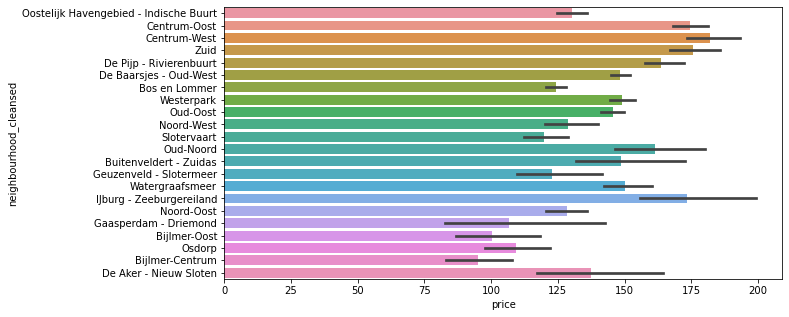

In [24]:
neighbourhood_list = df.neighbourhood_cleansed.unique()
plt.figure(figsize=(10,5))
sns.barplot(x = "price", y = "neighbourhood_cleansed", data= df)

Plot a correlation matrix as instructed in the Coursework proforma:

<AxesSubplot:>

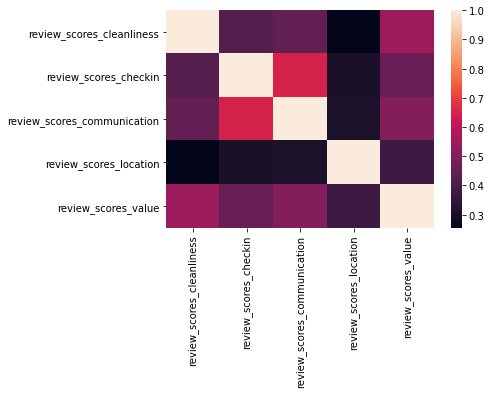

In [25]:
df_rev = df.iloc[:,36:41]
corr = df_rev.corr()
sns.heatmap(corr)

In [26]:
df_rev.corr()

,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_cleanliness,1.000000,0.420568,0.443582,0.255190,0.544959
review_scores_checkin,0.420568,1.000000,0.650482,0.304652,0.456856
review_scores_communication,0.443582,0.650482,1.000000,0.309776,0.503676
review_scores_location,0.255190,0.304652,0.309776,1.000000,0.375697
review_scores_value,0.544959,0.456856,0.503676,0.375697,1.000000


Plot a geographical distribution as instructed in the Coursework proforma:

In [27]:
!pip install chart_studio

In [28]:
df_price_150 = df[df.price > 150].reset_index(drop=True)
df_price_150.price = pd.to_numeric(df_price_150['price'])

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks

cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [29]:
df_price_150.iplot(
    x='latitude',
    y='longitude',
    size=df_price_150.price/150, 
    text='price',
    mode='markers',
    layout=dict(
        xaxis=dict(type='log', title='latitude'),
        yaxis=dict(title='longitude'),
        title='CRIM vs INDUS Sized by TAX'))

In [30]:
df_price_150["color"] = 0

price_arr = list(df_price_150.price)
color_arr = []

for i in range(0,len(price_arr)):
    
    if price_arr[i] >= 150 and price_arr[i] < 300:
        color_arr.append(150)
    elif price_arr[i] >= 300 and price_arr[i] < 450:
        color_arr.append(300)
    elif price_arr[i] >= 450 and price_arr[i] < 600:
        color_arr.append(450)
    elif price_arr[i] >= 600 and price_arr[i] < 750:
        color_arr.append(600)
    elif price_arr[i] >= 750:
        color_arr.append(750)
        
df_price_150.color = color_arr

In [31]:
import plotly.express as px
fig = px.scatter(df_price_150, y = "latitude", x = "longitude", size = "price", color = "price", hover_data=["price"])
fig.show()

---

# Part 2: Statistical analysis and recommender system
## CMT 309 Data Science Portfolio

Instructions:

- Answer the questions by filling in the appropriate sections. 
- Do not remove or rename section headings or any code that has been provided, unless instructed otherwise.
- You can add as many additional cells with code as you like.
- Sometimes you are asked to provide an answer or justification. To this end, double-click on the text cells and add your answer/explanation following the text "YOUR ANSWER:".

Before submitting,

- Ensure that the code is clean, readable, and well documented. 
- Restart the kernel (to wipe all variables) and then run the code from top to bottom to produce all intermediate outputs. 

## Question 2a: Linear regression and t-tests


In [32]:
df.columns

Index(['level_0', 'index', 'id', 'name', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'reviews_per_month',
       'host_days'],
      dtype='object')

In [33]:
df_review = df.iloc[:,34:41];df_review

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,98.0,10.0,10.0,10.0,10.0,9.0,10.0
1,89.0,10.0,10.0,10.0,10.0,10.0,9.0
2,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3,99.0,10.0,10.0,10.0,10.0,10.0,10.0
4,97.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...
18462,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_review = df_review.dropna()

In [35]:
df_review.isnull().sum()

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
dtype: int64

In [36]:
df_review

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,98.0,10.0,10.0,10.0,10.0,9.0,10.0
1,89.0,10.0,10.0,10.0,10.0,10.0,9.0
2,100.0,10.0,10.0,10.0,10.0,10.0,10.0
3,99.0,10.0,10.0,10.0,10.0,10.0,10.0
4,97.0,10.0,10.0,10.0,10.0,10.0,10.0
...,...,...,...,...,...,...,...
18390,100.0,10.0,10.0,10.0,10.0,10.0,10.0
18391,100.0,10.0,10.0,10.0,10.0,10.0,10.0
18395,100.0,10.0,10.0,10.0,10.0,10.0,10.0
18397,80.0,8.0,6.0,8.0,8.0,8.0,8.0


In [37]:
X = df_review.iloc[:,1:8]
y = df_review.iloc[:,0:1]

In [38]:
X.head(5)

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,10.0,10.0,10.0,10.0,9.0,10.0
1,10.0,10.0,10.0,10.0,10.0,9.0
2,10.0,10.0,10.0,10.0,10.0,10.0
3,10.0,10.0,10.0,10.0,10.0,10.0
4,10.0,10.0,10.0,10.0,10.0,10.0


In [39]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [41]:
linear_model = linear_model.LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred = linear_model.predict(X_test)

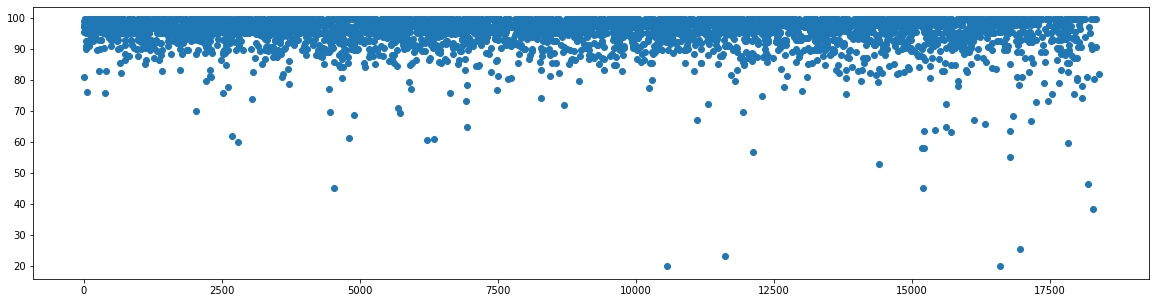

In [43]:
plt.figure(figsize=(20,5))
plt.scatter(x = X_test.index, y = y_pred)

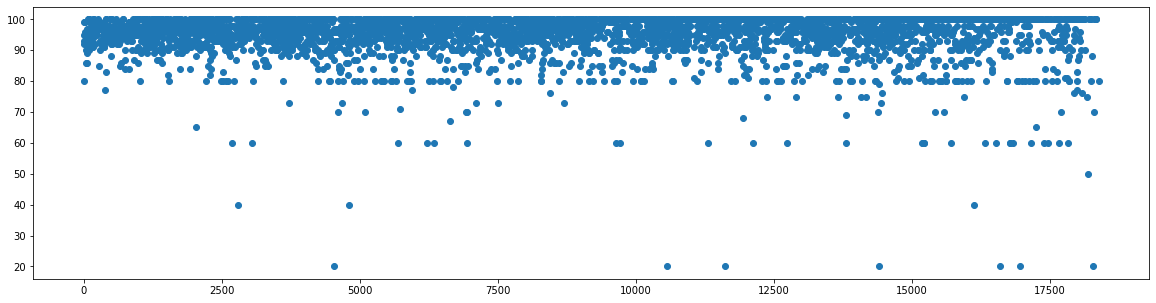

In [44]:
plt.figure(figsize=(20,5))
plt.scatter(x = X_test.index, y = y_test)

In [45]:
df_compare = pd.DataFrame()
df_compare["True"] = y_test.review_scores_rating

In [46]:
df_compare["Pred"] = y_pred

In [47]:
df_compare = df_compare.reset_index().drop("index",1)

/Users/hasancanuzuner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='True'>

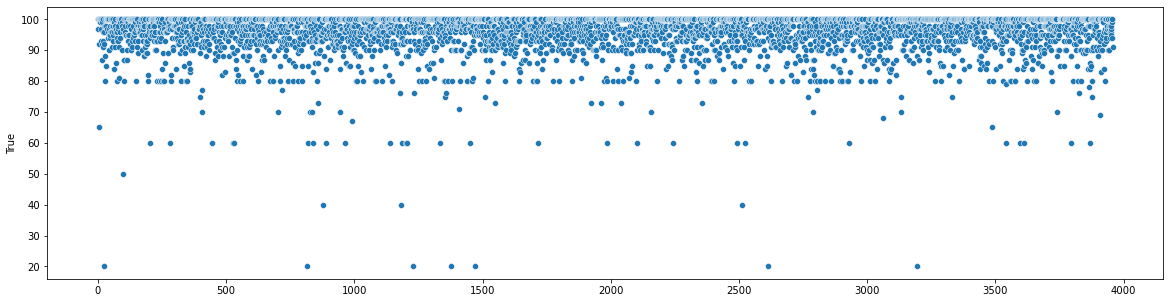

In [48]:
plt.figure(figsize= (20,5))
sns.scatterplot(df_compare.index, df_compare["True"])

/Users/hasancanuzuner/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:ylabel='Pred'>

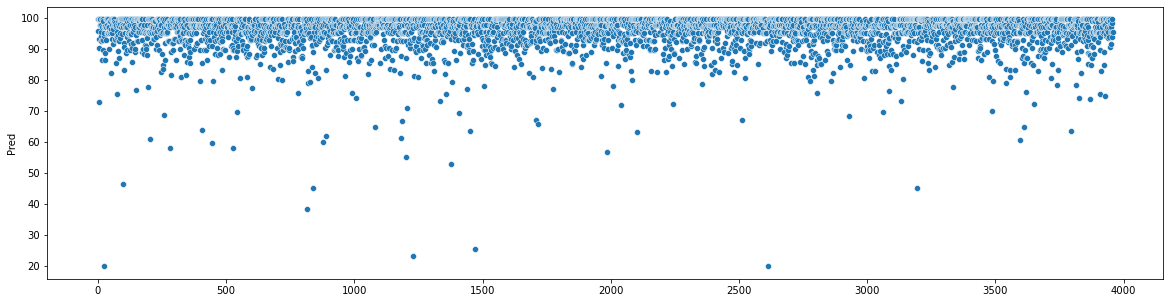

In [49]:
plt.figure(figsize= (20,5))
sns.scatterplot(df_compare.index, df_compare["Pred"])

**T-test questions**:

Which room types are significantly different in terms of nightly price?

YOUR ANSWER (1-2 sentences): ...[double click to edit]...

Do the significances change if you perform Bonferroni correction to the alpha level: https://en.wikipedia.org/wiki/Bonferroni_correction ?

YOUR ANSWER (1-2 sentences): ...


In [50]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Hotel room', 'Shared room'],
      dtype=object)

In [51]:
price_private = df[df.room_type == 'Private room'].price
price_home = df[df.room_type == 'Entire home/apt'].price
price_hotel = df[df.room_type == 'Hotel room'].price
price_shared = df[df.room_type == 'Shared room'].price

In [52]:
avg_private = price_private.mean()
print(avg_private)
avg_home = price_home.mean()
print(avg_home)
avg_hotel = price_hotel.mean()
print(avg_hotel)
avg_shared = price_shared.mean()
print(avg_shared)

93.70834403080873
170.70454899506225
131.75177304964538
105.0


In [53]:
from scipy.stats import ttest_ind
from scipy.stats import t

arr = [price_private, price_home, price_hotel, price_shared]



t_stat, p = ttest_ind(price_home, price_hotel)
print("price_private, price_home", f't={t_stat}, p={p}')



price_private, price_home t=2.973679553656271, p=0.00294735684860147


## Question 2b: Linear regression with variable selection

Provide a short justification (2-3 sentences) for your choice of variables.

YOUR ANSWER: ...

<AxesSubplot:>

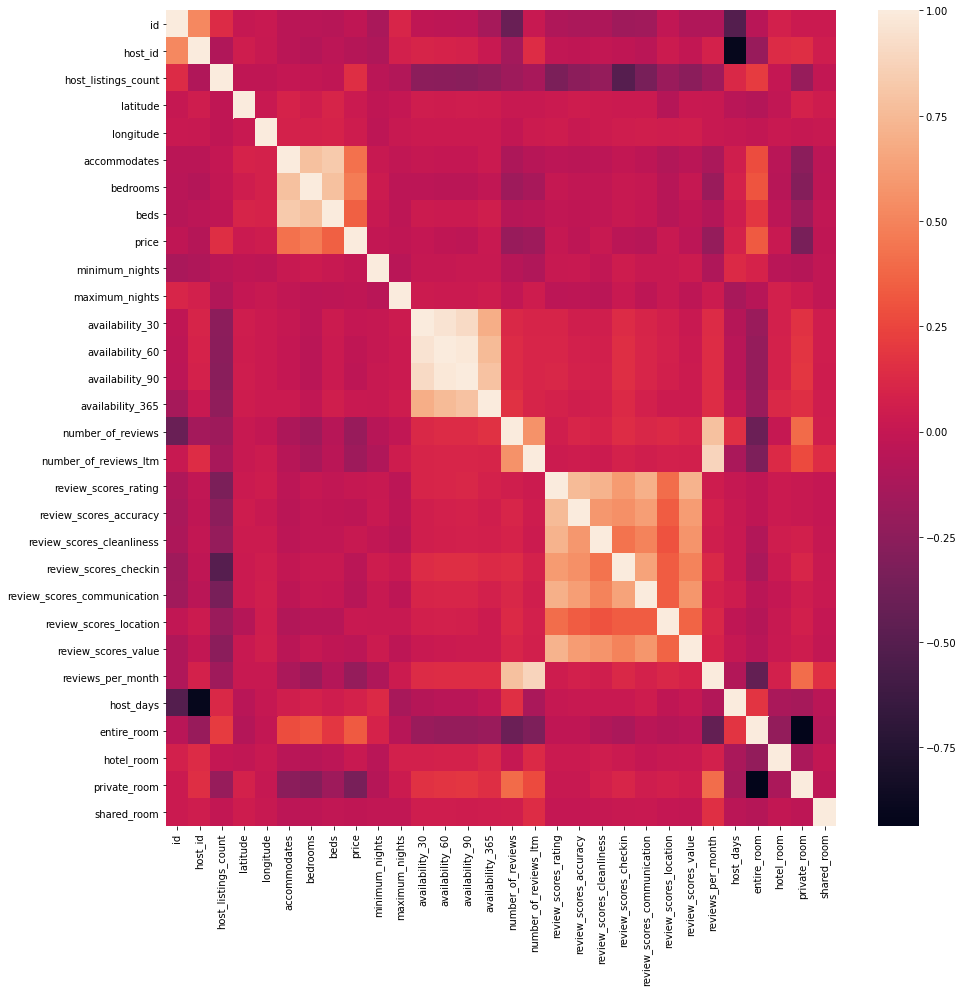

In [60]:
# Define dummy binary variables for room type variable

room_type_dummuies=pd.get_dummies(df.room_type)
room_type_dummuies.columns=['entire_room', 'hotel_room', 'private_room', 'shared_room']

# merge it with th main dataframe
df=pd.concat([df,room_type_dummuies], axis=1)

# reassure and safety check that just one time binary variables of room type have been generated 

df=df.drop(room_type_dummuies.columns , axis=1)
df=pd.concat([df,room_type_dummuies], axis=1)

# Check the dataframe accuracy
# df.info()

# Observe the correlation matrix to get insight from multivariate point of view
plt.figure(figsize=(15,15))
corr_matrix_df=df.corr()
sns.heatmap(corr_matrix_df)




In [78]:
fit=sm.OLS.from_formula('target ~ host_days',df).fit() 

In [79]:
fit.rsquared_adj

0.0057143050403963835

In [80]:
d = {}
d[12] = "ali"

In [88]:
d[12]

'ali'

In [106]:
arr = ["ali", "veli"]

In [109]:
arr.index("ali")

0

In [136]:
arr_r2

[0.0057143050403963835]

In [142]:
selected_var=['host_days','availability_365','accommodates',
            'host_listings_count','bedrooms','private_room','review_scores_rating',
            'entire_room','number_of_reviews_ltm','reviews_per_month']

In [145]:
fit=sm.OLS.from_formula('target ~ df[selected_var[0]] + df[selected_var[1]] + df[selected_var[2]] + df[selected_var[3]]+ df[selected_var[4]] + df[selected_var[5]] + df[selected_var[6]] +df[selected_var[7]]+df[selected_var[8]]+df[selected_var[9]]', df).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.296
Model:                            OLS   Adj. R-squared:                  0.293
Method:                 Least Squares   F-statistic:                     97.35
Date:                Tue, 04 May 2021   Prob (F-statistic):          1.90e-168
Time:                        00:22:34   Log-Likelihood:                -14804.
No. Observations:                2328   AIC:                         2.963e+04
Df Residuals:                    2317   BIC:                         2.969e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -53.0180     47.682     -1.112      0.266    -146.523      40.487
df[selected_var[0]]    -0.0001      0.004     -0.039      0.969      -0.007       0.007
df[selected_var[1]]     0.0987      0.022      4.540      0.000       0.056       0.141
df[selected_var[2]]    14.8876      2.898      5.138      0.000       9.205      20.570
df[selected_var[3]]     1.0334      0.146      7.075      0.000       0.747       1.320
df[selected_var[4]]    52.3113      5.115     10.228      0.000      42.282      62.341
df[selected_var[5]]   -88.3255     17.968     -4.916      0.000    -123.560     -53.091
df[selected_var[6]]     1.2583      0.452      2.785      0.005       0.372       2.144
df[selected_var[7]]   -22.6723     17.990     -1.260      0.208     -57.951      12.606
df[selected_var[8]]    -0.8377      0.357     -2.344      0.019      -1.538      -0.137
df[selected_var[9]]     1.7241      3.498      0.493      0.622      -5.135       8.583
==============================================================================
Omnibus:                     4240.736   Durbin-Watson:                   1.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10827890.000
Skew:                          12.741   Prob(JB):                         0.00
Kurtosis:                     336.134   Cond. No.                     4.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [139]:
target=df.price
predictors=['host_days','availability_365','accommodates',
            'host_listings_count','bedrooms','private_room','review_scores_rating',
            'entire_room','number_of_reviews_ltm','reviews_per_month']

for i in range (0, len(predictors)):
    best_feature = []
    arr_name  = []
    arr_r2  = []
    a = ""
    max = -999
    for j in predictors:
        a = "df[j]"
        str = 'target ~ {}'.format(a)
        fit=sm.OLS.from_formula(str,df).fit() 
        r2 = fit.rsquared_adj
        #print(r2)
        arr_name.append(j)
        arr_r2.append(r2)
        if max > r2:
            max = max
        else:
            max = r2
    ind = arr_r2.index(max)
    print((arr_name[ind], max))
    a = a + "+" + arr_name[ind]
    predictors.remove(arr_name[ind])
    best_feature.append(arr_name[ind])

('bedrooms', 0.21555862899189193)
('accommodates', 0.17990371611739275)
('private_room', 0.11767047368259365)
('entire_room', 0.10917361317336893)
('reviews_per_month', 0.04600940702044698)
('number_of_reviews_ltm', 0.03060613397256884)
('host_listings_count', 0.020850024360171693)
('host_days', 0.0057143050403963835)
('availability_365', 0.00016707776828939203)
('review_scores_rating', -0.0003844976865048366)


In [122]:
arr_name

['review_scores_rating']

In [93]:
dic

{0.0057143050403963835: 2        2.0
 3        1.0
 4        2.0
 5        2.0
 6        1.0
         ... 
 18166    0.0
 18168    2.0
 18194    2.0
 18336    2.0
 18451    9.0
 Name: host_listings_count, Length: 2328, dtype: float64,
 0.00016707776828939203: 2        2.0
 3        1.0
 4        2.0
 5        2.0
 6        1.0
         ... 
 18166    0.0
 18168    2.0
 18194    2.0
 18336    2.0
 18451    9.0
 Name: host_listings_count, Length: 2328, dtype: float64,
 0.17990371611739275: 2        2.0
 3        1.0
 4        2.0
 5        2.0
 6        1.0
         ... 
 18166    0.0
 18168    2.0
 18194    2.0
 18336    2.0
 18451    9.0
 Name: host_listings_count, Length: 2328, dtype: float64,
 0.020850024360171693: 2        2.0
 3        1.0
 4        2.0
 5        2.0
 6        1.0
         ... 
 18166    0.0
 18168    2.0
 18194    2.0
 18336    2.0
 18451    9.0
 Name: host_listings_count, Length: 2328, dtype: float64,
 0.21555862899189193: 2        2.0
 3        1.0
 4        2.0

In [69]:
"" + "host_days" + " + "

'host_days + '

## Question 2c: Recommendation systems

### Recommend a neighbourhood given a budget

In [ ]:
# your code...

### Price recommender for hosts

In [ ]:
# your code...